# Project Overview

In this project, we shall attempt to build a classification model to predict whether a passenger on the titanic survived or not based on certain characteristics.
The dataset is from the kaggle titanic machine learning competition and can be found here: https://www.kaggle.com/c/titanic/data. Information on the columns of the dataset can be found here as well

The evaluation metric that will be used in evaluating our model will be accuracy ie the number of correct predictions divided by the total number of predictions as specified by the competition evaluation metric.


# Importing the relevant packages and the data


In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
titanic=pd.read_csv('train.csv')
titanic.info()
titanic.Ticket

test=pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

# Exploratory data analysis

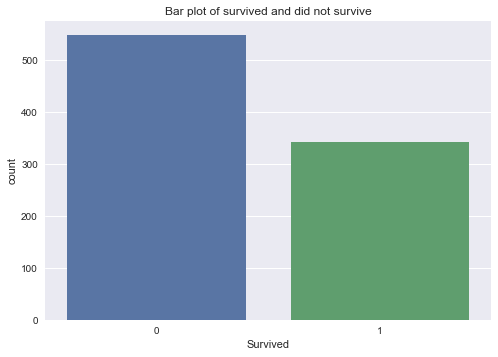

In [32]:
# Let us have a look at the number of suvived vs non survived
plt.style.use('seaborn')
sns.countplot(x='Survived',data=titanic)
plt.title('Bar plot of survived and did not survive');


In [33]:
titanic.Survived.value_counts()
# 549 dead vs 342 survived


0    549
1    342
Name: Survived, dtype: int64

In [34]:
# Let us look at the survived based on some features. First, proportion of people who survived for passengers in each class
#(1=upper,2=middle,3=lower)

# get a count of passengers in each class

titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

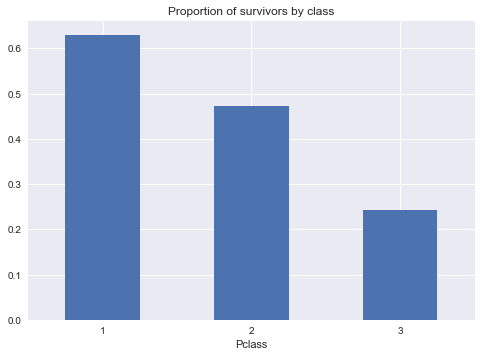

In [35]:

plt.style.use('seaborn')
byclass=titanic.groupby('Pclass').Survived.mean()

byclass.plot(kind='bar')
plt.title('Proportion of survivors by class')
plt.xticks(rotation=0);

As expected, passengers in the upper class have the highest survival rate followed by passengers in the middle class followed by passengers in the lower class.
We can conclude that pclass is an important attribute in predicting whether a passenger survived the disaster or not

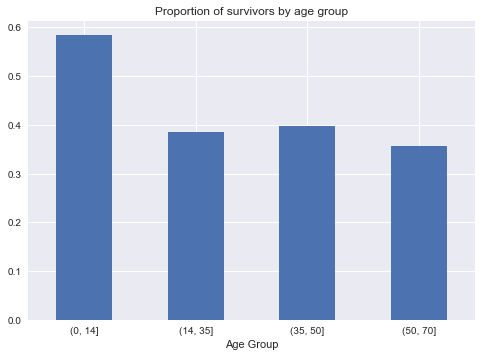

In [36]:
# Next, let us do some analysis based on the age of the passengers

titanic['age_temp']=pd.cut(titanic.Age,bins=[0,14,35,50,70])

age_series=titanic.groupby('age_temp').Survived.mean()
age_series.plot(kind='bar')
plt.title('Proportion of survivors by age group')
plt.xlabel('Age Group')
plt.xticks(rotation=0);

# People who are in the 0-14 age group have higher chances of survival based on the dataset, indicating that age is a useful p
#predictor of age group

In [37]:
# Analysis by sex. Let us have a look at the proportion of survivors by gender

titanic.groupby('Sex').Survived.mean()

# We can see that the proportion of females who survived the disaster is much higher than the proportion of males who 
#survived the disaster. According to research it is found that children and women would embark on the lifeboats first,
#explaning this discrepancy between the proportion of survivors between males and females

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


C:\Users\SHYAMAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

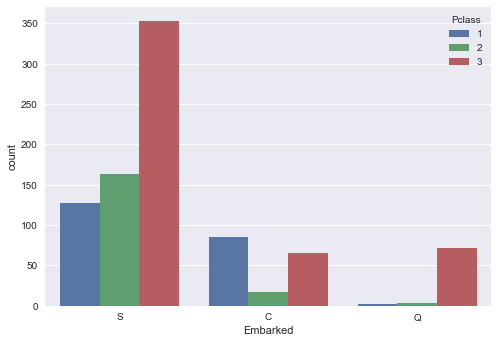

In [38]:
# Lastly we shall look at the survivorship in relation to the port of embarkation.

print(titanic.groupby('Embarked').Survived.mean())

#There appears to be some correlation between the embarked port and survivorship. Let us further investigate this

sns.countplot('Embarked',data=titanic,hue='Pclass')

#From the plot, it is clear that it just happens that a higher proportion of those in C happened to be in the first class
#while the proportion of first class passengers is lower for the other 2 embarkation points. Hence, it can be concluded that
# the port of embarkation likely has no true effect on survivability and we should drop this column when training our model


# Data processing
Now that we have explored our data, it is time to process the data in order to make it ready to train some classification models on the data set. 

In [39]:
# let us keep track of our preprocessing so that we can create a function to process our test data

def preprocessor(df):
    df['relatives']=df.SibSp+df.Parch
    df.drop(labels=['SibSp','Parch'],axis=1,inplace=True)
    df.drop(['Name','PassengerId','Ticket','Embarked'],axis=1,inplace=True)
    #dealing with missing data
    df.drop('Cabin',axis=1,inplace=True)
    
   #categorical missing values
    
    for key,value in df.items():
        if pd.api.types.is_string_dtype(value):
            df.key.fillna(df[key].mode(),inplace=True)
    
    
    #numeric data missing values
    
    for key,value in df.items():
        if pd.api.types.is_numeric_dtype(value):
            df[key+'_temp']=df.groupby('Pclass').key.transform('median')
            df[key]=df.apply(lambda x:x[key+'_temp'] if np.isnan(x[key]) else x[key],axis=1)
    
    df['Pclass']=df.Pclass.astype('category')
    
    
    
   

In [40]:
titanic.info()
#let us drop the temporary column that we created
titanic.drop('age_temp',axis=1,inplace=True)
#Combining Sibsp and Parch into one column. We can combine both columns in order to form one relatives column

titanic['relatives']=titanic.SibSp+titanic.Parch

# We can now drop the SibSp and Parch columns
titanic.drop(labels=['SibSp','Parch'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_temp     709 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [41]:
# Next we shall drop the columns which are not necesary in helping us build a good model: namely the passenger's name, ID,
#ticket number (Ticket) and the embarked columns
titanic.drop(['Name','PassengerId','Ticket','Embarked'],axis=1,inplace=True)

In [42]:
#Next we shall take a look at missing values
titanic.info()
#We note that the cabin column is around 75% missing data, hence it would not make sense to impute missing items with a value
#Hence we shall drop that column as well
titanic.drop('Cabin',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   Fare       891 non-null    float64
 5   Cabin      204 non-null    object 
 6   relatives  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [43]:
titanic.info()
#Now only the age column is missing


titanic.groupby('Pclass').Age.median()

#Here we note that different passengers on different classes of ticket have different median ages.

#Hence, instead of imputing the missing ages with the mean age of the whole data set, we shall do it by median of the class
#the passenger is in

titanic['age_temp']=titanic.groupby('Pclass').Age.transform('median')

titanic['Age']=titanic.apply(lambda x: x['age_temp'] if np.isnan(x['Age']) else x['Age'],axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   Fare       891 non-null    float64
 5   relatives  891 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


KeyError: "['age'] not found in axis"

In [44]:
titanic.info()

titanic.drop('age_temp',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   Fare       891 non-null    float64
 5   relatives  891 non-null    int64  
 6   age_temp   891 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 48.9+ KB


In [45]:
# we note that the fare column also varies wiedly between the different classes of passengers and hence we can see that all
# numeric data is dependent on Pclass Hence, in case any of the numeric columns are missing we can just group by class and 
#fill accordingly.
titanic.groupby('Pclass').Fare.median()


Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [46]:
#Let us convert the Pclass column into a categorical column
titanic['Pclass']=titanic.Pclass.astype('category')

titanic.info()

#converting the categorical columns into numeric columns
titanic=pd.get_dummies(titanic,drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    category
 2   Sex        891 non-null    object  
 3   Age        891 non-null    float64 
 4   Fare       891 non-null    float64 
 5   relatives  891 non-null    int64   
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 35.9+ KB


# Training and evaluating a model
Now that our data is fully processed and all columns are numerical, it is time to test out various machine learning algorithms and decide which one is best for our dataset

The models that we are going to try are LogisticRegressor, RandomForestClassifier, KNeighboursClassifier and GradientBoostingClassifer from the sklearn package 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

X=titanic.drop('Survived',axis=1)
y=titanic.Survived

#splitting the data into training sets and validation sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
def evaluator(model):
    results={}
    for name,model in models.items():
       
        results[name]=np.mean(cross_val_score(model,X,y))
    return results
        

models={'LR':LogisticRegression(),
       'RF':RandomForestClassifier(),
       'GBC':GradientBoostingClassifier(),
       'KNN':KNeighborsClassifier()
       }

evaluator(models)

# we can see that the GBC is the best performing model but KNN is the worst. Before deciding to use the GBC as our chosen model
# let us run this again but scaling our numeric variables this time

C:\Users\SHYAMAL\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'LR': 0.7979976147134518,
 'RF': 0.8204820789655389,
 'GBC': 0.8361496453455526,
 'KNN': 0.6891406691356475,
 'xgb': 0.8226853304877283}

In [67]:
#Let us try this again but this time scaling our numeric columns
scaler=MinMaxScaler()
scaling_titanic=titanic.copy()
x=scaling_titanic.drop('Survived',axis=1)
x=scaler.fit_transform(x)

y=scaling_titanic.Survived
xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2)
def evaluator(model):
    results={}
    for name,model in models.items():
       
        results[name]=np.mean(cross_val_score(model,x,y))
    return results
        

models={'LR':LogisticRegression(),
       'RF':RandomForestClassifier(),
       'GBC':GradientBoostingClassifier(),
       'KNN':KNeighborsClassifier()}

evaluator(models)

#immediately, we note that the KNN classifier performs much better under scaling but the other classifiers do not have a 
#significant amount of improvement but the other models do not see significant improvement.

#Nevertheless, the GBC remains our best performing model and we shall use it and we do not have to scale the 

{'LR': 0.7934906785512522,
 'RF': 0.8215931203314293,
 'GBC': 0.8137279517921033,
 'KNN': 0.8081036971941498}

# Hyperparameter tuning

Now that we have selected the GBC as our final model, we shall tune the parameters of the model to further improve it.

In [71]:
from sklearn.model_selection import GridSearchCV
# first, we find the optimal number of estimators
gbc_grid={'n_estimators':[10,100,1000]}
model=GradientBoostingClassifier()
gbc_mod=GridSearchCV(model,gbc_grid,n_jobs=-1,cv=5)
gbc_mod.fit(X,y)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]})

In [72]:
gbc_mod.best_params_

{'n_estimators': 100}

In [75]:
#we shall use the default number of 100 estimators, while trying out more parameters

gbc_grid={'max_depth':[1,5,10,20],"max_features":["auto",'sqrt'],
     "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]}

model=GradientBoostingClassifier()
gbc_mod=GridSearchCV(model,gbc_grid,n_jobs=-1,cv=5)
gbc_mod.fit(X,y)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]})

In [76]:
gbc_mod.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [83]:
#let us try running the evaluator on the best params model

models={'GBC':GradientBoostingClassifier(max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=4)}
evaluator(models)

#Approximately 1 percent improvement over our default model! Hence we shall use this model to make our predictions before
# submitting to kaggle



{'GBC': 0.8417550687339151}

In [106]:
#final model

final_model=GradientBoostingClassifier(max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=4)
final_model.fit(X,y)

GradientBoostingClassifier(max_depth=5, max_features='auto',
                           min_samples_split=4)

# Making predictions and submitting to kaggle
We shall use our final model to make predictions and submit to kaggle. First, we need to import and preprocess our test data
just like how we processed our training data

In [105]:
#importing test data
test=pd.read_csv('test.csv')
id_=test.PassengerId
#processing our test data

def preprocessor(df):
    df['relatives']=df.SibSp+df.Parch
    df.drop(labels=['SibSp','Parch'],axis=1,inplace=True)
    df.drop(['Name','PassengerId','Ticket','Embarked'],axis=1,inplace=True)
    #dealing with missing data
    df.drop('Cabin',axis=1,inplace=True)
    
   #categorical missing values
    
    for key,value in df.items():
        if pd.api.types.is_string_dtype(value):
            df[key].fillna(df[key].mode(),inplace=True)
    
    
    #numeric data missing values
    
    for key,value in df.items():
        if pd.api.types.is_numeric_dtype(value):
            df[key+'_temp']=df.groupby('Pclass')[key].transform('median')
            df[key]=df.apply(lambda x:x[key+'_temp'] if np.isnan(x[key]) else x[key],axis=1)
            df.drop(key+'_temp',axis=1,inplace=True)
    
    df['Pclass']=df.Pclass.astype('category')
    df=pd.get_dummies(df,drop_first=True)
    return df
test=preprocessor(test)
test.info()

#test data looks good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        418 non-null    float64
 1   Fare       418 non-null    float64
 2   relatives  418 non-null    int64  
 3   Pclass_2   418 non-null    uint8  
 4   Pclass_3   418 non-null    uint8  
 5   Sex_male   418 non-null    uint8  
dtypes: float64(2), int64(1), uint8(3)
memory usage: 11.1 KB


In [110]:
final_model=LogisticRegression()
final_model.fit(X,y)
pred=final_model.predict(test)

In [111]:
submission=pd.DataFrame({'Survived':pred},index=id_)
submission.to_csv('Submission.csv')